# Python GIS

In [4]:
import pandas as pd
from shapely.geometry import Point, LineString, Polygon

In [23]:
df=pd.read_csv('../raw_data/bpe_t2_clean.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.tail(4)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_commerce_spec')","('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE
11415,61230101,A,0,1,2018,7.197874,43.659079,0,0,0,...,1,0,0,0,0,1.0,0.0,0.0,Médecin généraliste,Santé
11416,61230101,A,0,1,2018,7.197874,43.659079,0,0,0,...,1,0,0,0,0,1.0,0.0,0.0,Médecin généraliste,Santé
11417,61230101,A,0,1,2018,7.197679,43.659326,0,0,0,...,1,0,0,0,0,0.0,1.0,0.0,Psychologue,Santé
11418,61230101,A,0,1,2018,7.197874,43.659079,0,0,0,...,1,0,0,0,0,1.0,0.0,0.0,Hôtel,Tourisme


In [9]:
df.iloc[0,5]

7.178601702949741

In [24]:
point1=Point(df.iloc[0,5],df.iloc[0,6])
point2=Point(df.iloc[11418,5],df.iloc[11418,6])

In [29]:
points =[]
for i in range(len(df)):
    t=Point(df.loc[i,'longitude'],df.loc[i,'latitude'])
    points.append(t)
print(points[0])

POINT (7.178601702949741 43.6586357455608)


In [30]:
df['dots']=points

In [31]:
df.head(2)

,iris_id,iris_type,iris_with_t1,iris_with_t2,AN,longitude,latitude,"('LAB', 'is_sport')","('LAB', 'is_leasure')","('LAB', 'is_medical')",...,"('LAB', 'is_grande_surface')","('LAB', 'is_high_educ')","('LAB', 'is_schools')","('LAB', 'is_transport')",Q_XY_acceptable,Q_XY_bonne,Q_XY_mauvaise,LAB,CLASSE,dots
0,61230102,H,0,1,2018,7.178602,43.658636,0,1,0,...,0,0,0,0,0.0,1.0,0.0,Électricien,Services a,POINT (7.178601702949741 43.6586357455608)
1,61230102,H,0,1,2018,7.178602,43.658636,0,0,1,...,0,0,0,0,0.0,1.0,0.0,Agence immobilière,Services a,POINT (7.178601702949741 43.6586357455608)


In [80]:
df.iris_id=df.iris_id.map(lambda x: str(0)+str(x))

In [81]:
iris_list=list(pd.unique(df.iris_id))
iris_list[:5]

['061230102', '060880301', '060880303', '060880201', '060881602']

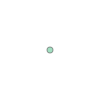

In [25]:
point1

In [15]:
type(point1)

shapely.geometry.point.Point

In [16]:
print(point1)

POINT (7.178601702949741 43.6586357455608)


In [33]:
point_dist = point1.distance(point2)
point_dist # the returned distance is based on the projection of the points degrees in WGS84
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 0.02 decimal degrees


In [34]:
# It is also possible to use coordinate tuples having the same outcome
line = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [37]:
line_t1 = pd.read_csv('gs://trampact_storage/data/coord_T1.csv')
line_t1.drop(columns='Unnamed: 0',inplace=True)

In [39]:
line_t1.head(2)

,y,x
0,43.723348,7.285484
1,43.722790,7.290817


In [40]:
points_t1 =[]
for i in range(len(line_t1)):
    t=Point(line_t1.loc[i,'x'],line_t1.loc[i,'y'])
    points_t1.append(t)
print(points_t1[0])

POINT (7.285484 43.723348)


In [41]:
line_t1['points_t1']=points_t1

In [42]:
line_t1.head(2)

,y,x,points_t1
0,43.723348,7.285484,POINT (7.285484 43.723348)
1,43.722790,7.290817,POINT (7.290817 43.72279)


In [43]:
line_t1.shape

(54, 3)

In [51]:
print(line_t1['points_t1'][0])

POINT (7.285484 43.723348)


## Trace Line1

In [56]:
line=[]
for i in range(len(line_t1)):
    t=(line_t1.loc[i,'x'],line_t1.loc[i,'y'])
    line.append(t)
line[0]

(7.285484, 43.723348)

In [57]:
line_t1=LineString(line)

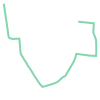

In [59]:
line_t1

# Iris poly dict

In [73]:
import shapefile as sp
from dbfread import DBF

In [74]:
class Iris():
    
    def __init__(self):
        self.get_files()
        self.get_records()
        self.get_iris_id()
    
    def get_files(self):
        #client = storage.Client().bucket('trampact_storage')

        #path_dbf = "gs://{}/{}/{}".format(bucket_name, path,'IRIS_GEO_2018_FRTOT.dbf')
        #path_shp = 'gs://{}/{}/{}'.format(bucket_name, path,'IRIS_GEO_2018_FRTOT.shp')
        
        path_dbf ='../raw_data/iris_geo/IRIS_GEO_2018_FRTOT.dbf'
        path_shp ='../raw_data/iris_geo/IRIS_GEO_2018_FRTOT.shp'

        self.dbf=DBF(path_dbf)
        self.shp = sp.Reader(path_shp)


    def get_records(self):
        records = []
        for record in self.dbf:
            records.append(dict(record))
        self.records = records

    def get_iris_id(self):
        iris_id = []
        for i in range(len(self.records)):
            r = self.records[i]['CODE_IRIS']
            iris_id.append(r)
        self.iris_id = iris_id
        
    def get_iris_type(self, iris_id):
        iris_type = {}
        for i in range(len(self.records)):
            iris_type[self.iris_id[i]]= self.records[i]['TYP_IRIS']
        self.iris_type = iris_type
        return iris_type[str(iris_id)]

    def get_box_coord(self, iris_id):
        shapes = self.shp.shapes()
        box_coord = {}
        for i in range(len(shapes)):
            box_coord[self.iris_id[i]] = shapes[i].bbox
        return box_coord[str(iris_id)]

    def get_poly_coord(self, iris_id):
        shapes = self.shp.shapes()
        poly_coord = {}
        for i in range(len(shapes)):
            poly_coord[self.iris_id[i]] = shapes[i].__geo_interface__['coordinates'][0]
        return poly_coord[str(iris_id)]   


In [75]:
iris=Iris()

In [96]:
iris_poly_dict ={}
for i in iris_list:
    iris_poly_dict[i]=iris.get_poly_coord(i)

In [97]:
iris_poly_dict

{'061230102': [(7.1959856577413905, 43.657056921357864),
  (7.195774097395779, 43.657065992095006),
  (7.195120754484691, 43.65739758301561),
  (7.194833551511202, 43.657560051058),
  (7.194604792125985, 43.657656286168724),
  (7.194355625604026, 43.65772807856572),
  (7.19387768781273, 43.65779428344968),
  (7.193202093073009, 43.65777980935637),
  (7.191494019422693, 43.65771595845033),
  (7.1882219273478, 43.65752135155024),
  (7.187093641155197, 43.65687871961938),
  (7.18633913867987, 43.6561026458479),
  (7.1852944755250086, 43.65536797601021),
  (7.1830024944084485, 43.65467411678529),
  (7.182394819463242, 43.654492969156706),
  (7.181871664131455, 43.65438155116909),
  (7.181410282498435, 43.65431731173908),
  (7.180973473022749, 43.654283661940674),
  (7.180437014168877, 43.654261954066214),
  (7.179552440267169, 43.654299589250094),
  (7.179137816889379, 43.65434887714709),
  (7.178922952613091, 43.654380568918384),
  (7.178760720180186, 43.654419246629345),
  (7.17868363927

## Make forms out of dict values

In [133]:
poly_forms={}
for k,v in iris_poly_dict.items():
    poly_forms[k]=Polygon(iris_poly_dict[v])

TypeError: unhashable type: 'list'

In [122]:
for i in iris_list[:3]:
    p_i=Polygon(iris_poly_dict[i])

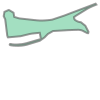

In [109]:
Polygon(iris_poly_dict['061230102'])

In [144]:
iris_poly_dict.keys()

dict_keys(['061230102', '060880301', '060880303', '060880201', '060881602', '060882602', '060883001', '060882901', '060882904', '060882903', '060882902', '060882905', '060881606', '060880903', '060883102', '060883301', '060880202', '060880206', '060880205', '060880203', '060880204', '060880402', '060880101', '060880401', '060880701', '060883801', '060881701', '060880102', '060882203', '060880103', '060882201', '060880509', '060880508', '060880604', '060880305', '060880304', '060882102', '060882104', '060883401', '060882002', '060882103', '060883403', '060882001', '060881902', '060882705', '060882702', '060882804', '060882805', '060882803', '060882802', '060882704', '060882906', '060882504', '060882303', '060882503', '060881901', '060882603', '060882302', '060882301', '060882502', '060882304', '060881801', '060882202', '060882101', '060882703', '060881705', '060881604', '060881704', '060881702', '060881601', '060881703', '060883002', '060883003', '060880403', '060883101', '060882601', '

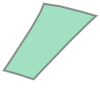

In [155]:
Polygon(list(iris_poly_dict.values())[1])

In [157]:
for i in range(100):
    p_i=Polygon(list(iris_poly_dict.values())[i])

ValueError: A LinearRing must have at least 3 coordinate tuples

In [149]:
len(list(iris_poly_dict.values()))

100